In [1]:
import pickle
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
plt.style.use('science')
import os
import re

from pepsflow.iPEPS_trainer import iPEPSTrainer
from pepsflow.models.observables import Observables

number_pattern = re.compile(r'\d+')
lambda_values = [lam for lam in np.arange(0.1, 4, 0.25)]

In [2]:
def extract_number(file: str) -> int:
    return int(number_pattern.search(file).group())

def plot_folder(folder: str, obs: str):
    """
    Plots the observable for all the files in the given folder.

    Args:
        folder (str): the folder containing the data
        obs (str): the observable to plot  
    """
    plt.figure(figsize=(6, 4))

    for file in sorted(os.listdir('data/' + folder, ), key=extract_number):
        with open('data/' + folder + '/' + file, 'rb') as f:
            data = pickle.load(f)
    
        chi = int(number_pattern.search(file).group())
        plot_data = np.abs(np.array(data[obs])) if obs == 'Mz' else data[obs]
        plt.plot(data["lambdas"], plot_data, 'v-', markersize=4, linewidth=0.5, label=rf'$\chi = {chi}$')

    plt.xlabel(r'$\lambda$', fontsize=14)
    plt.ylabel(obs, fontsize=14)
    plt.legend()

# Trying reruns with random initial tensors

In [33]:
chi_values = [4, 8, 16]
for chi in chi_values:
    trainer = iPEPSTrainer(chi = chi, d = 2, gpu=False)
    trainer.exe(lambda_values, epochs=5, use_prev=False, runs = 5)
    trainer.save_data(fn = f"random/chi{chi}")

  0%|          | 0/16 [00:02<?, ?it/s]


KeyboardInterrupt: 

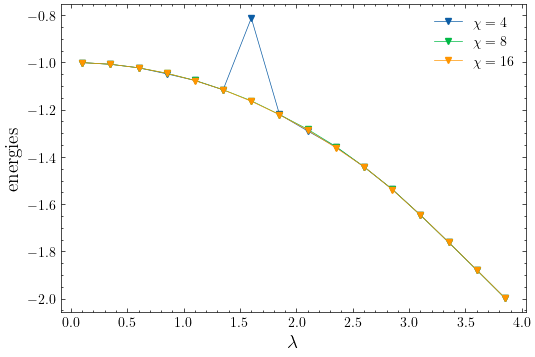

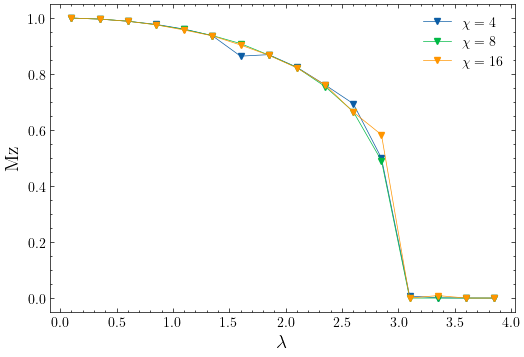

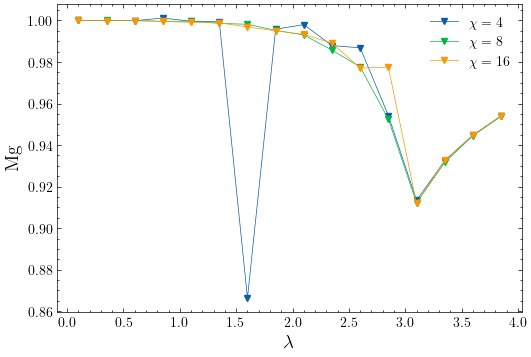

In [52]:
plot_folder('random', 'energies')
plot_folder('random', 'Mz')
plot_folder('random', 'Mg')

# Reruns with initial tensors from previous lambda runs

In [34]:
lambda_values = [lam for lam in np.arange(1.5, 4.5, 0.1)]
chi_values = [16]
for chi in chi_values:
    trainer = iPEPSTrainer(chi = chi, d = 2, gpu=False)
    trainer.exe(lambda_values, epochs=5, use_prev=True, lr=0.01, max_iter=20)
    trainer.save_data(fn = f'prev_lambda/chi{chi}')

  0%|          | 0/30 [00:02<?, ?it/s]


KeyboardInterrupt: 

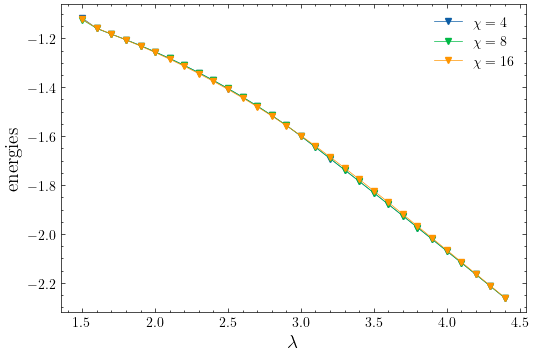

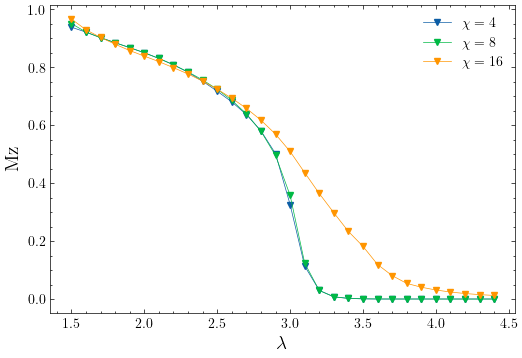

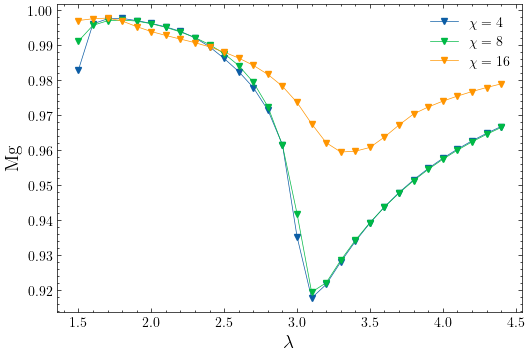

In [35]:
plot_folder('prev_lambda', 'energies')
plot_folder('prev_lambda', 'Mz')
plot_folder('prev_lambda', 'Mg')

# Trying reruns with initial tensors from previous runs

In [41]:
data = pickle.load(open('data/random/chi4.pkl', 'rb'))
chi_values = [8, 16, 32]

for chi in chi_values:
    trainer = iPEPSTrainer(chi = chi, d = 2, gpu=False, data_prev=data)
    trainer.exe(epochs=5, max_iter=30, lr = 0.01)
    trainer.save_data(fn = f"prev_chi_lr/chi{chi}")
    data = trainer.data
    trainer.clear_data()

100%|██████████| 16/16 [01:21<00:00,  5.10s/it]


Data saved to data\prev_chi_lr/chi8.pkl


100%|██████████| 16/16 [01:54<00:00,  7.13s/it]


Data saved to data\prev_chi_lr/chi16.pkl


100%|██████████| 16/16 [03:49<00:00, 14.35s/it]

Data saved to data\prev_chi_lr/chi32.pkl


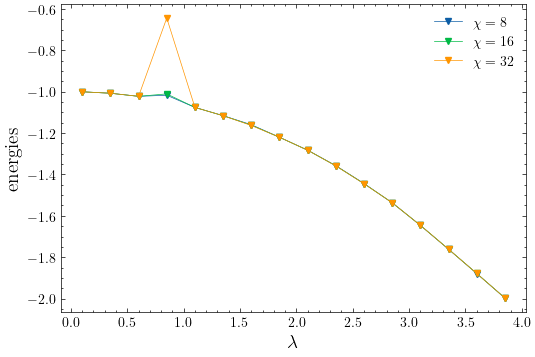

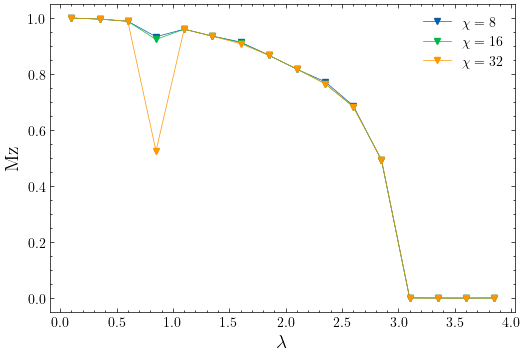

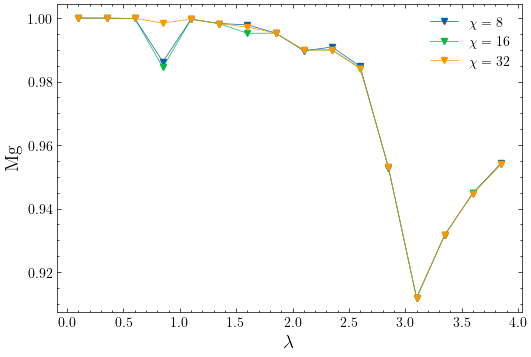

In [42]:
plot_folder('prev_chi_lr', 'energies')
plot_folder('prev_chi_lr', 'Mz')
plot_folder('prev_chi_lr', 'Mg')

# Varying the learning rate

In [4]:
rates = [0.01, 0.1, 1, 2, 10]

In [3]:
trainer = iPEPSTrainer(chi = 4, d = 2, gpu=False)

for lr in rates:
    trainer.exe(epochs=5, lr=lr, lambdas=lambda_values)
    trainer.save_data(fn = f"lr/lr{lr}")
    trainer.clear_data()

100%|██████████| 16/16 [01:15<00:00,  4.71s/it]


Data saved to data\lr/lr0.01.pkl


 50%|█████     | 8/16 [00:33<00:33,  4.18s/it]

LinAlgError occurred. Retrying...


100%|██████████| 16/16 [01:07<00:00,  4.25s/it]


Data saved to data\lr/lr0.1.pkl


 50%|█████     | 8/16 [00:29<00:31,  3.96s/it]

LinAlgError occurred. Retrying...


 56%|█████▋    | 9/16 [00:35<00:31,  4.53s/it]

LinAlgError occurred. Retrying...
LinAlgError occurred. Retrying...


 94%|█████████▍| 15/16 [01:15<00:06,  6.56s/it]

LinAlgError occurred. Retrying...


100%|██████████| 16/16 [01:26<00:00,  5.38s/it]


Data saved to data\lr/lr1.pkl


 19%|█▉        | 3/16 [00:12<00:50,  3.87s/it]

LinAlgError occurred. Retrying...


 69%|██████▉   | 11/16 [00:45<00:23,  4.67s/it]

LinAlgError occurred. Retrying...


 88%|████████▊ | 14/16 [01:01<00:09,  4.95s/it]

LinAlgError occurred. Retrying...
LinAlgError occurred. Retrying...


 94%|█████████▍| 15/16 [01:10<00:06,  6.15s/it]

LinAlgError occurred. Retrying...


100%|██████████| 16/16 [01:14<00:00,  4.67s/it]


Data saved to data\lr/lr2.pkl


 50%|█████     | 8/16 [00:19<00:20,  2.52s/it]

LinAlgError occurred. Retrying...


 56%|█████▋    | 9/16 [00:22<00:18,  2.61s/it]

LinAlgError occurred. Retrying...
LinAlgError occurred. Retrying...
LinAlgError occurred. Retrying...
LinAlgError occurred. Retrying...
LinAlgError occurred. Retrying...


 75%|███████▌  | 12/16 [00:44<00:19,  4.85s/it]

LinAlgError occurred. Retrying...


 81%|████████▏ | 13/16 [00:48<00:13,  4.49s/it]

LinAlgError occurred. Retrying...
LinAlgError occurred. Retrying...
LinAlgError occurred. Retrying...


 88%|████████▊ | 14/16 [00:55<00:10,  5.45s/it]

LinAlgError occurred. Retrying...
LinAlgError occurred. Retrying...


100%|██████████| 16/16 [01:02<00:00,  3.93s/it]

Data saved to data\lr/lr10.pkl


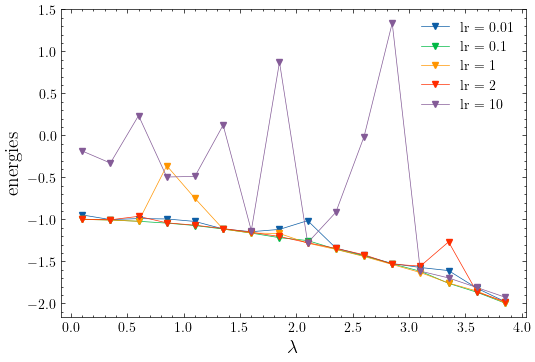

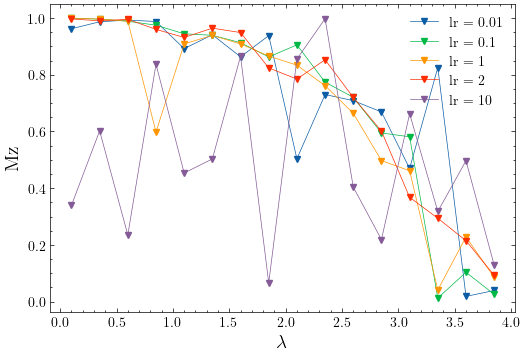

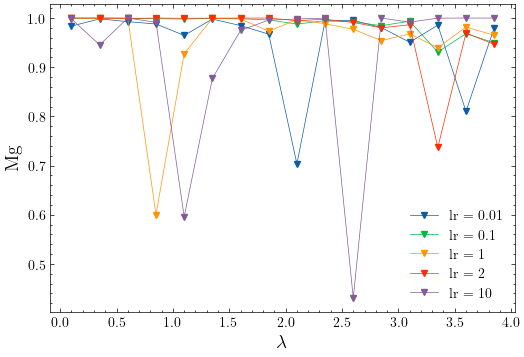

In [5]:
plot_folder('lr', 'energies')
plt.legend([ f'lr = {lr}' for lr in rates])
plt.show()
plot_folder('lr', 'Mz')
plt.legend([ f'lr = {lr}' for lr in rates])
plt.show()
plot_folder('lr', 'Mg')
plt.legend([ f'lr = {lr}' for lr in rates])
plt.show()


# Without computing magnetezation

In [3]:
data = pickle.load(open('data/random/chi4.pkl', 'rb'))
chi_values = [8]

for chi in chi_values:
    trainer = iPEPSTrainer(chi = chi, d = 2, gpu=False, data_prev=data)
    trainer.exe(epochs=5, max_iter=30, lr = 0.01)
    trainer.save_data(fn = f"new/chi{chi}")
    data = trainer.data
    trainer.clear_data()

100%|██████████| 16/16 [03:24<00:00, 12.81s/it]

Data saved to data\new/chi8.pkl


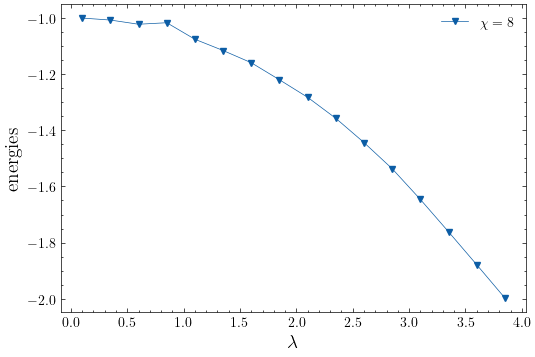

In [6]:
plot_folder('new', 'energies')

In [9]:
data = pickle.load(open('data/new/chi8.pkl', 'rb'))


{'states': [array([[[[[ 0.09405744, -0.0769846 ],
            [-0.0769846 , -0.05181463]],
  
           [[-0.0769846 , -0.20399447],
            [-0.05181463, -0.02706427]]],
  
  
          [[[-0.0769846 , -0.05181463],
            [-0.20399447, -0.02706427]],
  
           [[-0.05181463, -0.02706427],
            [-0.02706427, -0.01496988]]]],
  
  
  
         [[[[ 0.35474043, -0.18745542],
            [-0.18745542, -0.16956116]],
  
           [[-0.18745542,  0.21665144],
            [-0.16956116,  0.10742152]]],
  
  
          [[[-0.18745542, -0.16956116],
            [ 0.21665144,  0.10742152]],
  
           [[-0.16956116,  0.10742152],
            [ 0.10742152, -0.80636127]]]]]),
  array([[[[[-0.22678152,  0.29831942],
            [ 0.29831942,  0.14763514]],
  
           [[ 0.29831942, -0.04704929],
            [ 0.14763514, -0.67062919]]],
  
  
          [[[ 0.29831942,  0.14763514],
            [-0.04704929, -0.67062919]],
  
           [[ 0.14763514, -0.67062919],
     